# Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data

In [2]:
marriage = pd.read_csv('Marriage.csv')

In [3]:
education = pd.read_csv('Education.csv')

# Cleaning Marriage data

In [4]:
marriage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATISTIC         352 non-null    object 
 1   Statistic Label   352 non-null    object 
 2   TLIST(A1)         352 non-null    int64  
 3   Year              352 non-null    int64  
 4   C01940V02373      352 non-null    object 
 5   Form of Ceremony  352 non-null    object 
 6   UNIT              352 non-null    object 
 7   VALUE             308 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 22.1+ KB


In [5]:
marriage.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01940V02373,Form of Ceremony,UNIT,VALUE
0,VSA42C01,Average Age of Groom,2000,2000,-,All ceremonies,Years,32.1
1,VSA42C01,Average Age of Groom,2000,2000,1,Roman Catholic,Years,31.1
2,VSA42C01,Average Age of Groom,2000,2000,2,Church of Ireland,Years,32.5
3,VSA42C01,Average Age of Groom,2000,2000,3,Presbyterian,Years,32.7
4,VSA42C01,Average Age of Groom,2000,2000,7,Other religious denominations,Years,31.1


#Drop missing values, Drop Extra Columns, Rename remaining columns, Set Year as index, slice index from 2009 onwards

In [6]:
marriage_clean = marriage.dropna()

In [7]:
marriage_new = marriage_clean.drop(["STATISTIC","TLIST(A1)","C01940V02373","UNIT"],axis=1)

In [8]:
marriage_tidy = marriage_new.rename({"Statistic Label":"Gender","Form of Ceremony":"Ceremony","VALUE":"Age"},axis = 1)

In [9]:
marriage_byyear = marriage_tidy.set_index("Year").sort_index().loc[2009:]

In [10]:
marriage_byyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 2009 to 2021
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    188 non-null    object 
 1   Ceremony  188 non-null    object 
 2   Age       188 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.9+ KB


In [11]:
marriage_byyear.head()

,Gender,Ceremony,Age
Year,,,
2009,Average Age of Bride,Other religious denominations,32.3
2009,Average Age of Bride,Roman Catholic,30.9
2009,Average Age of Bride,All ceremonies,31.8
2009,Average Age of Groom,Civil marriages,37.0
2009,Average Age of Groom,Other religious denominations,35.4


#find categories(unique values) in statistic and ceremony columns

In [12]:
marriage_byyear.Gender.unique()

array(['Average Age of Bride', 'Average Age of Groom'], dtype=object)

In [13]:
marriage_byyear.Ceremony.unique()

array(['Other religious denominations', 'Roman Catholic',
       'All ceremonies', 'Civil marriages', 'Presbyterian',
       'Church of Ireland', 'The Spiritualist Union of Ireland',
       'The Humanist Association'], dtype=object)

In [14]:
marriage_byyear.describe()

,Age
count,188.000000
mean,34.771866
std,2.195161
min,30.200000
25%,33.200000
50%,34.800000
75%,36.525000
max,40.581193


In [15]:
marriage_byyear_all = marriage_byyear[marriage_byyear['Ceremony'] == 'All ceremonies']

In [16]:
#Split by gender, change values to Female or Male, reset index

In [17]:
Bride_marriage_age = marriage_byyear_all[marriage_byyear_all['Gender'] == 'Average Age of Bride'].reset_index()

In [18]:
Bride_marriage_age

,Year,Gender,Ceremony,Age
0,2009,Average Age of Bride,All ceremonies,31.800000
1,2010,Average Age of Bride,All ceremonies,32.000000
2,2011,Average Age of Bride,All ceremonies,32.500000
3,2012,Average Age of Bride,All ceremonies,32.600000
4,2013,Average Age of Bride,All ceremonies,32.800000
5,2014,Average Age of Bride,All ceremonies,33.000000
6,2015,Average Age of Bride,All ceremonies,33.200000
7,2016,Average Age of Bride,All ceremonies,33.800000
8,2017,Average Age of Bride,All ceremonies,34.100000
9,2018,Average Age of Bride,All ceremonies,34.400000


In [19]:
F_marriage_age = Bride_marriage_age.assign(Gender="Female")

In [20]:
F_marriage_age

,Year,Gender,Ceremony,Age
0,2009,Female,All ceremonies,31.800000
1,2010,Female,All ceremonies,32.000000
2,2011,Female,All ceremonies,32.500000
3,2012,Female,All ceremonies,32.600000
4,2013,Female,All ceremonies,32.800000
5,2014,Female,All ceremonies,33.000000
6,2015,Female,All ceremonies,33.200000
7,2016,Female,All ceremonies,33.800000
8,2017,Female,All ceremonies,34.100000
9,2018,Female,All ceremonies,34.400000


In [21]:
Groom_marriage_age= marriage_byyear_all[marriage_byyear_all['Gender'] == 'Average Age of Groom'].reset_index()

In [22]:
M_marriage_age = Groom_marriage_age.assign(Gender="Male")

In [23]:
M_marriage_age

,Year,Gender,Ceremony,Age
0,2009,Male,All ceremonies,34.000000
1,2010,Male,All ceremonies,34.100000
2,2011,Male,All ceremonies,34.600000
3,2012,Male,All ceremonies,34.700000
4,2013,Male,All ceremonies,34.900000
5,2014,Male,All ceremonies,35.000000
6,2015,Male,All ceremonies,35.300000
7,2016,Male,All ceremonies,35.700000
8,2017,Male,All ceremonies,36.100000
9,2018,Male,All ceremonies,36.400000


# Cleaning Education data

In [24]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        3024 non-null   object
 1   STATISTIC Label  3024 non-null   object
 2   TLIST(Q1)        3024 non-null   object
 3   Quarter          3024 non-null   object
 4   C02076V02508     3024 non-null   int64 
 5   Age Group        3024 non-null   object
 6   C02199V02655     3024 non-null   object
 7   Sex              3024 non-null   object
 8   C02757V03327     3024 non-null   int64 
 9   Education Level  3024 non-null   object
 10  UNIT             3024 non-null   object
 11  VALUE            3024 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 283.6+ KB


In [25]:
education.head()

,STATISTIC,STATISTIC Label,TLIST(Q1),Quarter,C02076V02508,Age Group,C02199V02655,Sex,C02757V03327,Education Level,UNIT,VALUE
0,EDQ01,Persons Aged 15-64,2009Q2,2009Q2,300,15 - 19 years,-,Both sexes,2,Primary,%,2
1,EDQ01,Persons Aged 15-64,2009Q2,2009Q2,300,15 - 19 years,-,Both sexes,4,Lower secondary,%,8
2,EDQ01,Persons Aged 15-64,2009Q2,2009Q2,300,15 - 19 years,-,Both sexes,5,Upper secondary,%,52
3,EDQ01,Persons Aged 15-64,2009Q2,2009Q2,300,15 - 19 years,-,Both sexes,65,Post leaving cert,%,11
4,EDQ01,Persons Aged 15-64,2009Q2,2009Q2,300,15 - 19 years,-,Both sexes,-4,Third level,%,27


#Add Year column , drop extra columns, set index as year

In [26]:
education['Year'] = education['Quarter'].str[:4].astype(int)

In [27]:
education.head()

,STATISTIC,STATISTIC Label,TLIST(Q1),Quarter,C02076V02508,Age Group,C02199V02655,Sex,C02757V03327,Education Level,UNIT,VALUE,Year
0,EDQ01,Persons Aged 15-64,2009Q2,2009Q2,300,15 - 19 years,-,Both sexes,2,Primary,%,2,2009
1,EDQ01,Persons Aged 15-64,2009Q2,2009Q2,300,15 - 19 years,-,Both sexes,4,Lower secondary,%,8,2009
2,EDQ01,Persons Aged 15-64,2009Q2,2009Q2,300,15 - 19 years,-,Both sexes,5,Upper secondary,%,52,2009
3,EDQ01,Persons Aged 15-64,2009Q2,2009Q2,300,15 - 19 years,-,Both sexes,65,Post leaving cert,%,11,2009
4,EDQ01,Persons Aged 15-64,2009Q2,2009Q2,300,15 - 19 years,-,Both sexes,-4,Third level,%,27,2009


In [28]:
ed_col_list = ['Year','Age Group','Sex','Education Level','VALUE']

In [29]:
education_data = education[ed_col_list].set_index('Year').sort_index().rename({'Age Group':'Age_Group','Education Level':'Educ_level','VALUE':'%Value'},axis=1)

In [30]:
education_data

,Age_Group,Sex,Educ_level,%Value
Year,,,,
2009,15 - 19 years,Both sexes,Primary,2
2009,15 - 19 years,Both sexes,Lower secondary,8
2009,15 - 19 years,Both sexes,Upper secondary,52
2009,15 - 19 years,Both sexes,Post leaving cert,11
2009,15 - 19 years,Both sexes,Third level,27
...,...,...,...,...
2022,60 - 64 years,Female,Third level,37
2022,60 - 64 years,Female,Higher certificate,4
2022,60 - 64 years,Female,Ordinary bachelor degree/professional qualific...,11


#find categories(unique values) in Age_Group, Sex and Educ_level columns

In [31]:
education_data.Age_Group.unique()

array(['15 - 19 years', '15 - 64 years', '20 - 24 years', '25 - 34 years',
       '35 - 44 years', '45 - 54 years', '55 - 59 years', '60 - 64 years'],
      dtype=object)

In [32]:
education_data.Sex.unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [33]:
education_data.Educ_level.unique()

array(['Primary', 'Lower secondary', 'Upper secondary',
       'Post leaving cert', 'Third level', 'Higher certificate',
       'Ordinary bachelor degree/professional qualification or both',
       'Honours bachelor degree/professional qualification or both',
       'Postgraduate diploma/degree or Doctorate (Ph.D.)'], dtype=object)

#Check Values for a single Year

In [34]:
ed2009= education_data.loc['2009']

In [35]:
ed2009

,Age_Group,Sex,Educ_level,%Value
Year,,,,
2009,15 - 19 years,Both sexes,Primary,2
2009,15 - 19 years,Both sexes,Lower secondary,8
2009,15 - 19 years,Both sexes,Upper secondary,52
2009,15 - 19 years,Both sexes,Post leaving cert,11
2009,15 - 19 years,Both sexes,Third level,27
...,...,...,...,...
2009,60 - 64 years,Female,Third level,22
2009,60 - 64 years,Female,Higher certificate,3
2009,60 - 64 years,Female,Ordinary bachelor degree/professional qualific...,8


In [36]:
ed2009_both = ed2009[(ed2009["Age_Group"]== '15 - 64 years') & (ed2009['Sex'] == "Both sexes")]

In [37]:
ed2009_both["%Value"].sum()

131

In [ ]:
#3rd level Education

In [76]:
third_level = education_data[(education_data['Educ_level']== 'Third level') & (education_data["Sex"] == 'Both sexes')].reset_index()

#split datasets by sex and ages 25-44 with 3rd level qualification, reset index

In [38]:
def split_ed(df, gender):
    gender = df.Sex == gender
    df = df.loc[gender]
    df = df[df["Age_Group"].isin(['25 - 34 years','35 - 44 years'])]
    df = df[df['Educ_level']== 'Third level']
    return df

In [39]:
female_ed = split_ed(education_data, "Female")

In [40]:
female_ed.head()

,Age_Group,Sex,Educ_level,%Value
Year,,,,
2009,25 - 34 years,Female,Third level,57
2009,35 - 44 years,Female,Third level,50
2010,25 - 34 years,Female,Third level,58
2010,35 - 44 years,Female,Third level,54
2011,25 - 34 years,Female,Third level,60


In [41]:
male_ed = split_ed(education_data, 'Male').reset_index()

In [42]:
male_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        28 non-null     int64 
 1   Age_Group   28 non-null     object
 2   Sex         28 non-null     object
 3   Educ_level  28 non-null     object
 4   %Value      28 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ KB


# Joining Dataframes

In [43]:
F_ed_wed = F_marriage_age.merge(female_ed, on = "Year").drop(["Sex"],axis=1)

In [44]:
M_ed_wed = M_marriage_age.merge(male_ed, on = "Year").drop(["Sex"],axis=1)

In [68]:
M_ed_wed.head()

,Year,Gender,Ceremony,Age,Age_Group,Educ_level,%Value
0,2009,Male,All ceremonies,34.0,25 - 34 years,Third level,44
1,2009,Male,All ceremonies,34.0,35 - 44 years,Third level,44
2,2010,Male,All ceremonies,34.1,25 - 34 years,Third level,46
3,2010,Male,All ceremonies,34.1,35 - 44 years,Third level,45
4,2011,Male,All ceremonies,34.6,25 - 34 years,Third level,45


# Analysis

In [ ]:
# Analysis of Marriage Age

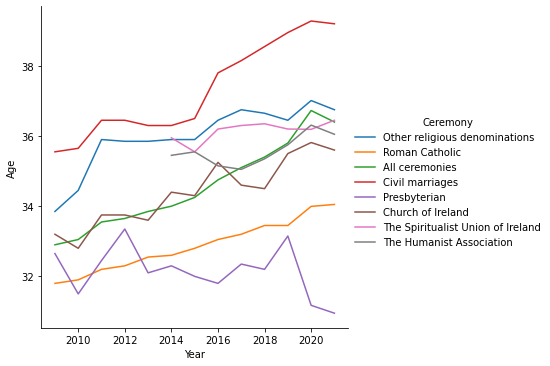

In [49]:
sns.relplot(x= "Year", y = "Age", data = marriage_byyear,kind = "line", hue = "Ceremony", ci=None)
plt.show()

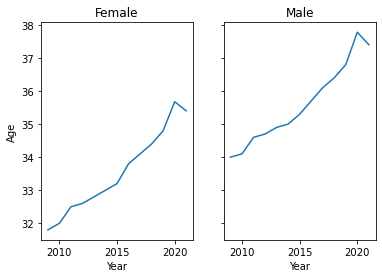

In [66]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.lineplot(data=F_marriage_age, x='Year', y='Age', ax=axes[0]).set_title('Female')
sns.lineplot(data=M_marriage_age, x='Year', y='Age', ax=axes[1]).set_title('Male')
plt.show()

In [67]:
#Analysis of 3rd Level Education 

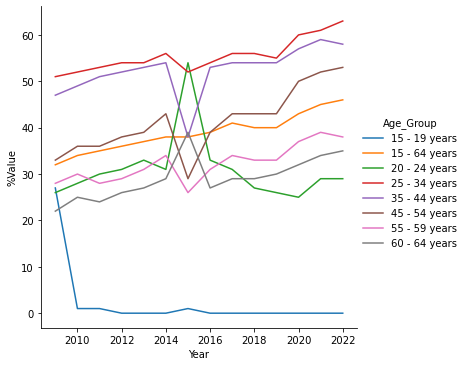

In [80]:
sns.relplot(x= "Year", y = "%Value", data = third_level ,kind = "line", hue = "Age_Group", ci=None)
plt.show()

In [ ]:
#Analysis of 3rd level education v Marriage Age for those aged 25-44

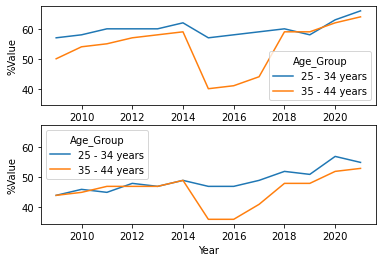

In [88]:
fig, axes = plt.subplots(2, 1, sharey=True)
sns.lineplot(x= "Year", y = "%Value", data = F_ed_wed , hue = "Age_Group",ax=axes[0] )
sns.lineplot(x= "Year", y = "%Value", data = M_ed_wed , hue = "Age_Group",ax=axes[1]
            )
plt.show()